## Importación de librerías

In [469]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import date

## Importación del dataset original

In [470]:
data_raw = pd.read_csv('../data/01-raw-properati.csv')
data_raw.head(3)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,...,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,...,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0


In [471]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992192 entries, 0 to 992191
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               992192 non-null  int64  
 1   ad_type          992192 non-null  object 
 2   start_date       992192 non-null  object 
 3   end_date         992192 non-null  object 
 4   created_on       992192 non-null  object 
 5   lat              838994 non-null  float64
 6   lon              839929 non-null  float64
 7   l1               992192 non-null  object 
 8   l2               992192 non-null  object 
 9   l3               934737 non-null  object 
 10  l4               225395 non-null  object 
 11  l5               4711 non-null    object 
 12  l6               0 non-null       float64
 13  rooms            503045 non-null  float64
 14  bedrooms         390699 non-null  float64
 15  bathrooms        773021 non-null  float64
 16  surface_total    448164 non-null  floa

In [472]:
data_raw.describe()

,id,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,992192.000000,838994.000000,839929.000000,0.0,503045.000000,390699.000000,773021.000000,448164.00000,4.369610e+05,9.478110e+05
mean,500338.438758,-59.266586,-34.793745,NaN,2.858577,2.086094,1.697637,493.51136,5.769533e+02,2.881687e+05
std,288685.497758,2.707383,3.066257,NaN,1.682454,2.705342,1.072722,4101.38179,7.383998e+04,5.560863e+06
min,1.000000,-180.000000,-54.842464,NaN,1.000000,-13.000000,1.000000,-200.00000,-1.700000e+02,0.000000e+00
25%,250259.750000,-58.756011,-34.921709,NaN,2.000000,1.000000,1.000000,50.00000,4.500000e+01,3.900000e+04
50%,500641.500000,-58.444383,-34.610508,NaN,3.000000,2.000000,1.000000,95.00000,7.500000e+01,9.800000e+04
75%,750507.250000,-58.058983,-34.459156,NaN,4.000000,3.000000,2.000000,270.00000,1.550000e+02,2.100000e+05
max,1000000.000000,-35.045025,85.051129,NaN,40.000000,900.000000,20.000000,200000.00000,2.700000e+07,3.100000e+09


In [473]:
data_raw.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'price'],
      dtype='object')

In [474]:
data_raw.nunique()

id                 992192
ad_type                 1
start_date            346
end_date              450
created_on            346
lat                317046
lon                315745
l1                      4
l2                     42
l3                   1262
l4                    976
l5                     21
l6                      0
rooms                  37
bedrooms               83
bathrooms              20
surface_total        4821
surface_covered      2607
currency                4
price_period            3
title              454605
description        638785
property_type          10
operation_type          3
price               18833
dtype: int64

## Filtrado de variables

### Eliminación de columnas

Justificación de columnas borradas:

- Id: es único por registro
- ad_type: hay un solo tipo
- l6: es nulo para todos los registros
- title: no es útil para los modelos a implementar
- description: no es útil para los modelos a implementar

In [475]:
data_preprocessed = data_raw.drop(columns=["id", "ad_type", "l6", "title", "description"])

#### Filtrar columnas por determinados valores

En principio, decido guardar las columnas de latitud y longitud para evaluar su influencia en los modelos. Se me ocurre que pueden afectar el precio dentro de cada zona (CABA y GBA Norte, Oeste y Sur).

##### Cantidad de valores por columna

In [476]:
data_preprocessed["operation_type"].value_counts()

operation_type
Venta                762318
Alquiler             199399
Alquiler temporal     30475
Name: count, dtype: int64

In [477]:
data_preprocessed["currency"].value_counts()

currency
USD    722707
ARS    220109
UYU      2085
PEN        40
Name: count, dtype: int64

In [478]:
data_preprocessed["l1"].value_counts()

l1
Argentina         973422
Uruguay            17929
Estados Unidos       783
Brasil                58
Name: count, dtype: int64

In [479]:
data_preprocessed["l2"].value_counts()

l2
Capital Federal                 249738
Buenos Aires Costa Atlántica    178712
Bs.As. G.B.A. Zona Norte        127510
Bs.As. G.B.A. Zona Sur          112975
Santa Fe                         93111
Bs.As. G.B.A. Zona Oeste         73172
Córdoba                          60877
Buenos Aires Interior            22280
Mendoza                          11558
Neuquén                          10642
Maldonado                        10101
Montevideo                        6318
Río Negro                         5507
Tucumán                           5425
Entre Ríos                        5113
Misiones                          4981
Salta                             3085
San Luis                          2101
Chaco                             1145
Corrientes                        1052
San Juan                          1014
Chubut                             979
La Pampa                           910
Colonia                            750
Canelones                          607
Jujuy                 

##### Cantidad de valores por filtro

Siguiendo las recomendaciones:

- Voy a enfocarme en los valores de venta, ya que es el tipo de operation_type que tiene más registros, y asumo que los precios para los distintos tipos de operaciones (Venta, Alquiler y Alquiler temporal) se ven afectados por factores externos a los datos que tengo para trabajar.
- Para descartar problemas de convertibilidad de monedas, trabajaré solo con propiedades valuadas en ARS.
- Y simplemente por recomendación de la consigna, trabajaré con propiedades de CABA y GBA. 

In [480]:
data_preprocessed = data_preprocessed[
    (data_preprocessed["operation_type"] == "Venta")
    & (data_preprocessed["currency"] == "USD")
    & (data_preprocessed["l1"] == "Argentina")
    & (data_preprocessed["l2"].isin(["Capital Federal", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Oeste"]))
]

data_preprocessed.shape[0]

394641

Respecto a los campos de fecha, asumo que:

- created_on: fecha de creación de la publicación de venta
- start_date: es la fecha de inicio de la publicación de venta
- end_date: es la fecha de fin de la publicación de venta, la cual NO garantiza que sea la fecha de venta

Transformo dichas variables en "cantidad de días"

In [481]:
def calculate_date_differences(df, end_date_col='end_date', start_date_col='start_date', created_on_col='created_on'):

    df[created_on_col] = pd.to_datetime(df[created_on_col])
    df[start_date_col] = pd.to_datetime(df[start_date_col])
    df[end_date_col] = pd.to_datetime(df[end_date_col], errors="coerce")

    today = pd.Timestamp(date.today())

    time_delta_created_today = today - df[created_on_col]
    time_delta_start_today = today - df[start_date_col]
    time_delta_end_today = today - df[end_date_col]

    df['days_since_creation'] = time_delta_created_today.dt.days
    df['days_since_start'] = time_delta_start_today.dt.days
    df['days_since_end'] = time_delta_end_today.dt.days

    return df

data_preprocessed = calculate_date_differences(data_preprocessed)

C:\Users\alejo\AppData\Local\Temp\ipykernel_15436\1350242129.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[end_date_col] = pd.to_datetime(df[end_date_col], errors="coerce")


In [482]:
data_preprocessed[["days_since_end", "end_date"]].head(5)

,days_since_end,end_date
0,NaN,NaT
1,1979.0,2020-06-08
2,NaN,NaT
3,NaN,NaT
4,2261.0,2019-08-31


In [483]:
(data_preprocessed["days_since_creation"] - data_preprocessed["days_since_start"]).value_counts()

0    394641
Name: count, dtype: int64

- Como la fecha de creación siempre coincide con la de inicio, me quedaré con una de las dos.
- También eliminaré las variables fecha originales

In [484]:
data_preprocessed.drop(columns=["days_since_creation","end_date","start_date","created_on"], inplace=True)

### Revisión de duplicados

#### Revisión inicial

Considerando todas las columnas (incluido el id), parece que no hay duplicados

In [485]:
data_raw.duplicated().value_counts()

False    992192
Name: count, dtype: int64

In [486]:
def get_duplicated_rows(df, columns_to_ignore):
    data_with_dropped_columns = df.drop(columns=columns_to_ignore)
    print(f"Columnas restantes: {data_with_dropped_columns.columns}")
    print("")
    print("Cantidad de columnas no repetidas (False) y repetidas (True)")
    return data_with_dropped_columns.duplicated().value_counts()

#### Suposiciones descartadas

Si asumiera que una misma propiedad puede publicarse varias veces, con distinto título, descripción, latitud y longitud

In [487]:
get_duplicated_rows(data_raw,["id","start_date", "end_date", "created_on", "title", "description", "lat", "lon"])

Columnas restantes: Index(['ad_type', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'currency',
       'price_period', 'property_type', 'operation_type', 'price'],
      dtype='object')

Cantidad de columnas no repetidas (False) y repetidas (True)


False    567769
True     424423
Name: count, dtype: int64

Si asumiera que una misma propiedad puede publicarse varias veces, con distinta descripción, latitud y longitud

In [488]:
get_duplicated_rows(data_raw, ["id","start_date", "end_date", "created_on", "description", "lat", "lon"])

Columnas restantes: Index(['ad_type', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'currency',
       'price_period', 'title', 'property_type', 'operation_type', 'price'],
      dtype='object')

Cantidad de columnas no repetidas (False) y repetidas (True)


False    673278
True     318914
Name: count, dtype: int64

Si asumiera que una misma propiedad puede publicarse varias veces, con distinto título y descripción.
Asumo que varias propiedades (por ejemplo, departamentos) pueden tener la misma latitud y longitud.

In [489]:
data_raw_without_apartments = data_raw[data_raw["property_type"].isin(["Departamento", "Otro", "PH", "Oficina"])]
get_duplicated_rows(data_raw_without_apartments, ["id", "start_date", "end_date", "created_on", "title", "description"])

Columnas restantes: Index(['ad_type', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency',
       'price_period', 'property_type', 'operation_type', 'price'],
      dtype='object')

Cantidad de columnas no repetidas (False) y repetidas (True)


False    390034
True     287378
Name: count, dtype: int64

#### Suposiciones válidas

Si solo quito la columna id

In [490]:
get_duplicated_rows(data_raw_without_apartments, ["id"])

Columnas restantes: Index(['ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1',
       'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'price'],
      dtype='object')

Cantidad de columnas no repetidas (False) y repetidas (True)


False    656114
True      21298
Name: count, dtype: int64

Si asumiera que una misma propiedad puede publicarse varias veces, con distinta descripción.
Asumo que varias propiedades (por ejemplo, departamentos) pueden tener la misma latitud y longitud.

In [491]:
get_duplicated_rows(data_raw_without_apartments, ["id", "start_date", "end_date", "created_on", "description"])

Columnas restantes: Index(['ad_type', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency',
       'price_period', 'title', 'property_type', 'operation_type', 'price'],
      dtype='object')

Cantidad de columnas no repetidas (False) y repetidas (True)


False    422573
True     254839
Name: count, dtype: int64

### Imputación de datos

Imputaré la media de la longitud de la zona en aquellos registros donde la latitud tenga valor y la longitud sea nula

In [492]:
data_preprocessed[["lat","lon"]].isna().value_counts()

lat    lon  
False  False    331477
True   True      62718
       False       446
Name: count, dtype: int64

In [493]:
data_preprocessed[(data_preprocessed["lat"].isna()) & (data_preprocessed["lon"].notna())].shape[0]

446

In [494]:
lat_mean_by_zone = data_preprocessed.groupby("l2")["lat"].transform("mean")
condition_for_filling = data_preprocessed["lat"].isna() & data_preprocessed["lon"].notna()

data_preprocessed["lat"] = data_preprocessed["lat"].mask(
    condition_for_filling,
    lat_mean_by_zone
)

## Limpieza y tratamiento de datos
    *   Gestionar valores duplicados y nulos irrelevantes.
    *   Decidir qué variables conservar para el modelo.
    *   Imputar valores faltantes (si corresponde).
    *   Detectar y manejar outliers (ej. establecer límites razonables de superficie/precio).

In [495]:
data_preprocessed.columns

Index(['lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'currency',
       'price_period', 'property_type', 'operation_type', 'price',
       'days_since_start', 'days_since_end'],
      dtype='object')

### Columnas con valores negativos

In [496]:
def count_negative_values(df, cols):
    cols_with_negative_values = []
    for col in cols:
        quantity_of_negative_values = df[df[col] < 0].shape[0]
        print(f"{col} tiene {quantity_of_negative_values} registros negativos")
        if quantity_of_negative_values > 0:
            cols_with_negative_values.append(col)
    return cols_with_negative_values
            
cols_with_negative_values = count_negative_values(data_preprocessed, ["rooms","bedrooms","bathrooms","surface_total","surface_covered","price","days_since_start","days_since_end"])

rooms tiene 0 registros negativos
bedrooms tiene 4 registros negativos
bathrooms tiene 0 registros negativos
surface_total tiene 1 registros negativos
surface_covered tiene 1 registros negativos
price tiene 0 registros negativos
days_since_start tiene 0 registros negativos
days_since_end tiene 0 registros negativos


Como son pocos los registros con valores negativos, los voy a borrar

In [497]:
indexes_to_delete = data_preprocessed[(data_preprocessed[cols_with_negative_values] < 0).any(axis=1)].index.tolist()
print(f"Cantidad de registros antes de la eliminación: {data_preprocessed.shape[0]}")
data_preprocessed.drop(indexes_to_delete, inplace=True)
print(f"Cantidad de registros después de la eliminación: {data_preprocessed.shape[0]}")

Cantidad de registros antes de la eliminación: 394641
Cantidad de registros después de la eliminación: 394637


### Columnas con valores únicos

Como price_period, l1, currency_type y operation_type tienen el mismo valor para todos los registros, las borro

In [498]:
data_preprocessed[["l1","price_period", "currency", "operation_type"]].value_counts()

l1         price_period  currency  operation_type
Argentina  Mensual       USD       Venta             131232
Name: count, dtype: int64

In [499]:
data_preprocessed.drop(columns=["l1","price_period", "currency", "operation_type"], inplace=True)

### Columnas con valores no lógicos

### Variables l2 a l5

La variable l5 solo se utiliza para el l4 = Nordelta. Por lo tanto, descartaré l5. Creo que sería útil si mi modelo se enfocara solo en precios en Nordelta.

In [500]:
data_preprocessed[["l4","l5"]].groupby("l5").value_counts()

l5                            l4      
Barrio Barrancas del Lago     Nordelta    108
Barrio Cabos del Lago         Nordelta     78
Barrio El Golf                Nordelta    449
Barrio El Yacht               Nordelta    146
Barrio La Alameda             Nordelta     80
Barrio La Isla                Nordelta     70
Barrio Lagos del Golf 1       Nordelta     67
Barrio Lagos del Golf 2       Nordelta    230
Barrio Las Caletas            Nordelta     53
Barrio Las Glorietas          Nordelta    120
Barrio Los Alisos             Nordelta    555
Barrio Los Castores           Nordelta    100
Barrio Los Lagos              Nordelta    238
Barrio Los Sauces             Nordelta    142
Barrio Los Tilos              Nordelta    167
Barrio Residencial Pacheco 1  Nordelta     13
Barrio Residencial Pacheco 2  Nordelta     12
BarrioPortezuelo              Nordelta    243
Enyoi                         Nordelta     31
Islas del Canal               Nordelta     50
QBay Yacht                    Nordelta   

Un mismo valor para l4 se repite en registros con distintos l3. Si bien es posible que existan dos o más l4 con el mismo nombre, de momento la descartaré para no complejizar mucho el modelo.

In [501]:
repeated_l4 = (
    data_preprocessed
        .groupby("l4")["l3"]
        .nunique()
)

l4_in_multiple_l3 = repeated_l4[repeated_l4 > 1].index
print(l4_in_multiple_l3)

Index(['Barrio Cerrado', 'Barrio Cerrado "La Chacra"', 'Canning', 'Gerli',
       'Malvinas Argentinas', 'Tortuguitas', 'Villa Adelina'],
      dtype='object', name='l4')


In [502]:
conflicting_rows = data_preprocessed[
    data_preprocessed["l4"].isin(l4_in_multiple_l3)
]

print(f"% de registros con l4 igual en distintos l3: {round(conflicting_rows[["l3","l4"]].shape[0] * 100 / data_preprocessed.shape[0], 2)}")

% de registros con l4 igual en distintos l3: 0.71


Veo que no hay valores de l3 compartidos para distintos l2

In [503]:
repeated_l3 = (
    data_preprocessed
        .groupby("l3")["l2"]
        .nunique()
)

l3_in_multiple_l2 = repeated_l3[repeated_l3 > 1].index
print(l3_in_multiple_l2.shape[0])

0


Pero cerca del 5% de los registros tienen l3 nulo. Para simplificar, voy a descartar la variable. En un futuro podría imputarle un valor por cercanía (por latitud y longitud) a registros del mismo l2.

In [504]:
data_preprocessed_without_l3 = data_preprocessed[data_preprocessed["l3"].isna()]["l2"]
data_preprocessed_without_l3.value_counts()

l2
Capital Federal             19528
Bs.As. G.B.A. Zona Norte     1699
Bs.As. G.B.A. Zona Oeste      126
Bs.As. G.B.A. Zona Sur         48
Name: count, dtype: int64

In [505]:
print(f"% de registros con l3 faltante: {round(data_preprocessed_without_l3.shape[0] * 100 / data_preprocessed.shape[0], 2)}")

% de registros con l3 faltante: 5.42


In [506]:
data_preprocessed.drop(columns=["l3","l4","l5"], inplace=True)

## Creación de nuevas variables

Superficie no cubierta (los valores negativos se analizarán más adelante):

In [507]:
data_preprocessed["surface_uncovered"] = data_preprocessed["surface_total"] - data_preprocessed["surface_covered"]

Publicaciones vigentes

In [541]:
data_preprocessed["available_publication"] = data_preprocessed["days_since_end"].isna().astype("category")

## Exploración de variables relevantes

In [509]:
data_preprocessed.columns

Index(['lat', 'lon', 'l2', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'price', 'days_since_start',
       'days_since_end', 'surface_uncovered', 'available_publication'],
      dtype='object')

In [542]:
numeric_cols = data_preprocessed.select_dtypes(np.number).columns
categoric_cols = data_preprocessed.select_dtypes(["category","object"]).columns

### Exploración sin quitar outliers

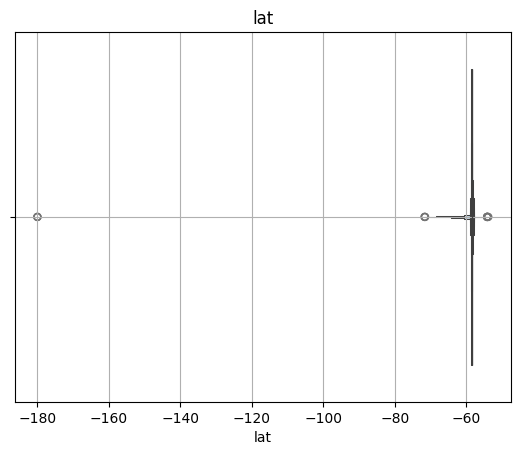

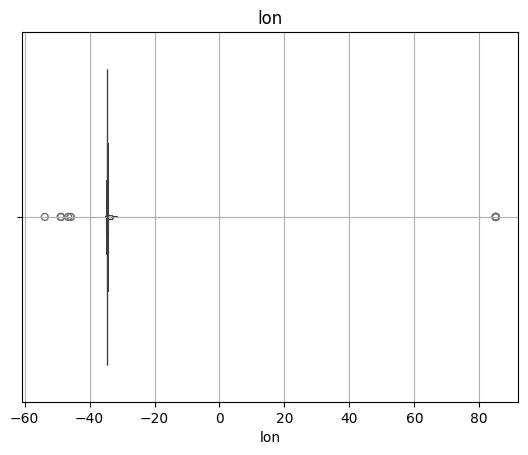

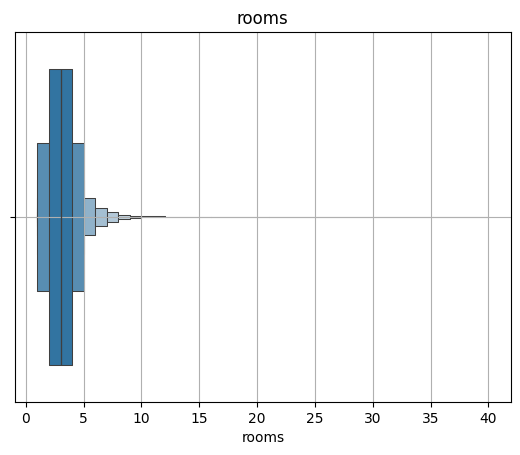

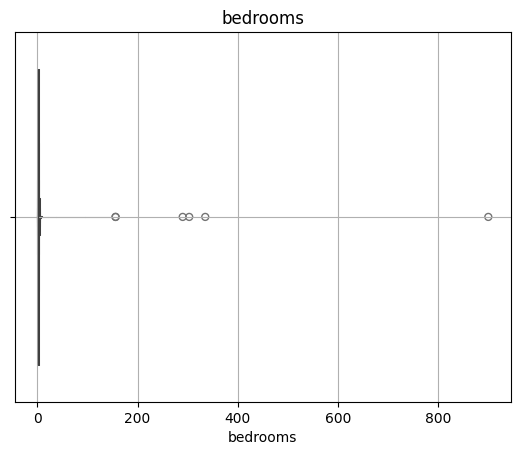

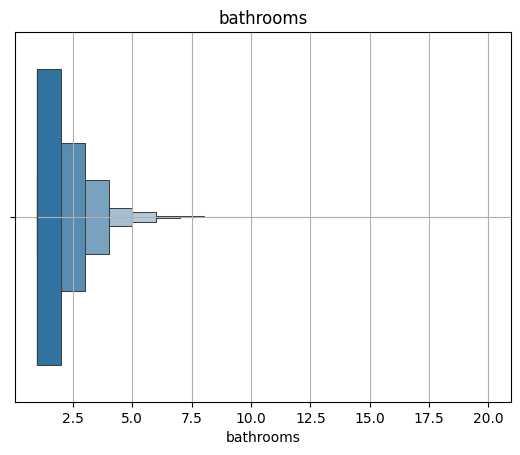

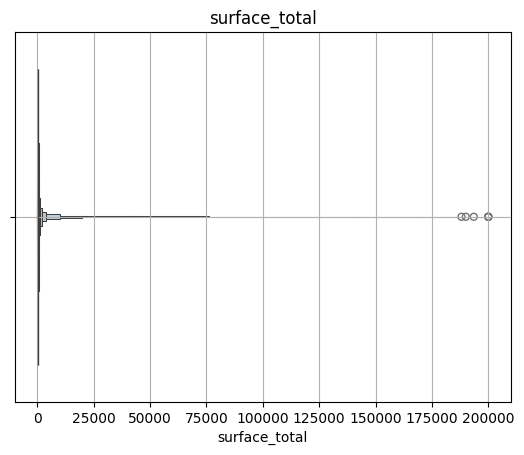

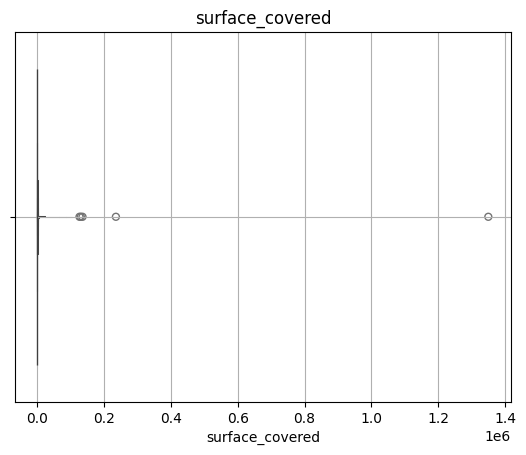

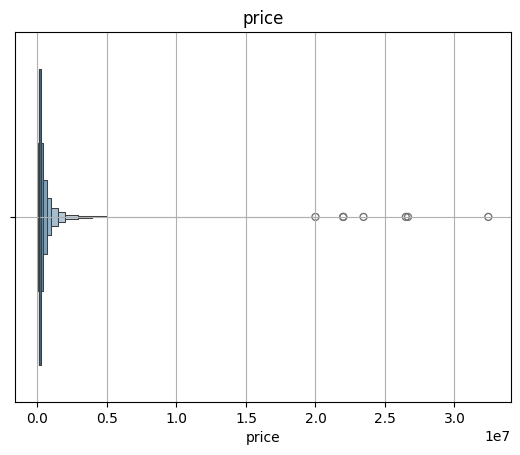

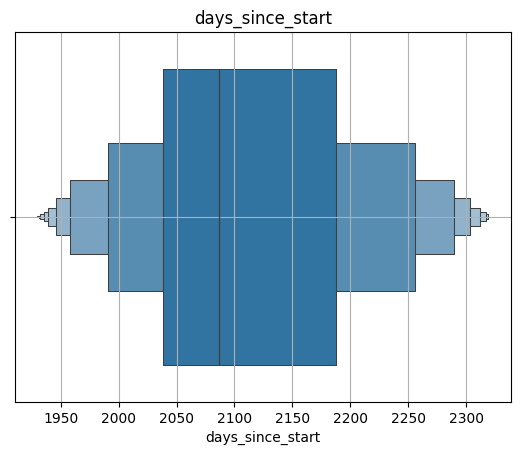

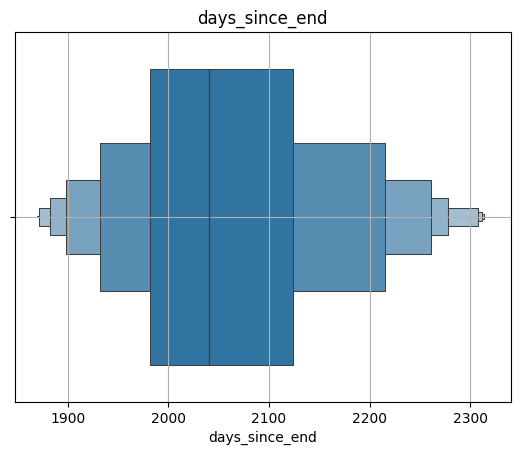

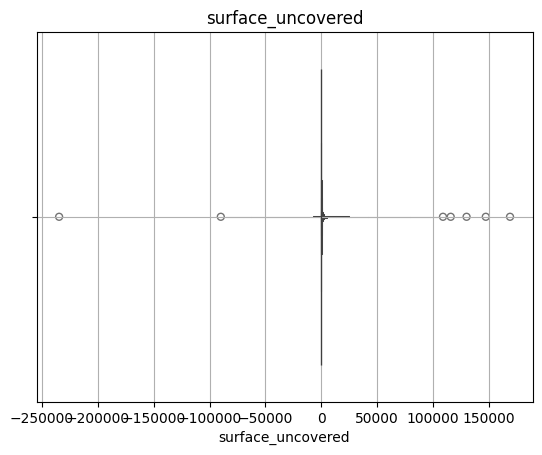

In [ ]:
for col in numeric_cols:
    sns.boxenplot(data=data_preprocessed, x=col)
    plt.grid(True)
    plt.title(col)
    plt.show()

### Detección y tratamiento de outliers numéricos

In [512]:
total_rows = data_preprocessed.shape[0]

#### Detección por rango intercuartilico 

In [513]:
for col in numeric_cols:
    Q1 = data_preprocessed[col].quantile(0.25)
    Q3 = data_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = data_preprocessed[(data_preprocessed[col] < lower_limit) | (data_preprocessed[col] > upper_limit)]
    print(f"% de outliers para {col}: {round(outliers.shape[0] * 100 / total_rows, 2)}")

% de outliers para lat: 10.4
% de outliers para lon: 15.59
% de outliers para rooms: 0.62
% de outliers para bedrooms: 0.2
% de outliers para bathrooms: 5.61
% de outliers para surface_total: 6.33
% de outliers para surface_covered: 3.47
% de outliers para price: 8.12
% de outliers para days_since_start: 0.0
% de outliers para days_since_end: 0.0
% de outliers para surface_uncovered: 7.45


#### Detección por percentiles extremos 

In [514]:
for col in numeric_cols:
    percentile_low  = data_preprocessed[col].quantile(0.005)
    percentile_high = data_preprocessed[col].quantile(0.995)

    filtered_rows = data_preprocessed[
        (data_preprocessed[col] > percentile_low) &
        (data_preprocessed[col] < percentile_high)
    ]
    print(f"% de outliers para {col}: {round(100 - (filtered_rows.shape[0] * 100 / data_preprocessed.shape[0]),2)}")

% de outliers para lat: 16.74
% de outliers para lon: 16.73
% de outliers para rooms: 49.47
% de outliers para bedrooms: 53.19
% de outliers para bathrooms: 65.27
% de outliers para surface_total: 48.37
% de outliers para surface_covered: 49.83
% de outliers para price: 1.1
% de outliers para days_since_start: 1.43
% de outliers para days_since_end: 26.54
% de outliers para surface_uncovered: 54.48


#### Tratamiento manual

Voy a comenzar descartando de manera manual según la información de los boxen plots que vimos más arriba

Latitud y longitud: establecí extremos que cubren todo CABA y GBA (lo hice manual, podría ajustarse más)

In [515]:
data_preprocessed[
    (
        (data_preprocessed["lon"] > -33.99)
        | (data_preprocessed["lon"] < -35.06)
        | (data_preprocessed["lat"] > -57.80)
        | (data_preprocessed["lat"] < -59.19)
    )
].shape[0]

2392

Como son pocos registros, los descarto

In [516]:
data_preprocessed = data_preprocessed[
    ~(
        (data_preprocessed["lon"] > -33.99)
        | (data_preprocessed["lon"] < -35.06)
        | (data_preprocessed["lat"] > -57.80)
        | (data_preprocessed["lat"] < -59.19)
    )
]

Superficie y superficie cubierta: analizo la cantidad de registros con superficies mayores a cierto número

In [517]:
def get_rows_with_highest_surface(max_surface_total, max_surface_covered):
    return data_preprocessed[
        (
            (data_preprocessed["surface_total"] > max_surface_total)
            | (data_preprocessed["surface_covered"] > max_surface_covered)
        )
    ].shape[0]

In [518]:
print(f"Cantidad de registro con más de 25000 metros cuadrados de superficie: {get_rows_with_highest_surface(25000, 25000)}")
print(f"Cantidad de registro con más de 10000 metros cuadrados de superficie: {get_rows_with_highest_surface(10000, 10000)}")
print(f"Cantidad de registro con más de 5000 metros cuadrados de superficie: {get_rows_with_highest_surface(5000, 5000)}")

Cantidad de registro con más de 25000 metros cuadrados de superficie: 384
Cantidad de registro con más de 10000 metros cuadrados de superficie: 810
Cantidad de registro con más de 5000 metros cuadrados de superficie: 1359


Viendo que son pocos registros, descartaré arbitrariamente las propiedades con superficie (total o cubierta) mayor a 10000 metros cuadrados (que sería el equivalente a una manzana)

In [519]:
data_preprocessed = data_preprocessed[
    ~ (
        (data_preprocessed["surface_total"] > 10000)
        | (data_preprocessed["surface_covered"] > 10000)
    )
]

Descartaré arbitrariamente los registros que superen los siguientes máximos para cada variable:
- rooms: 15
- bedrooms: 15
- bathrooms: 7    

In [520]:
data_preprocessed[
    (
        (data_preprocessed["rooms"] > 15)
        | (data_preprocessed["bedrooms"] > 15)
        | (data_preprocessed["bathrooms"] > 7)
    )
].shape[0]

586

Como son pocos registros, los elimino

In [521]:
data_preprocessed = data_preprocessed[
    ~ (
        (data_preprocessed["rooms"] > 15)
        | (data_preprocessed["bedrooms"] > 15)
        | (data_preprocessed["bathrooms"] > 7)
    )
]

Superficie total vs cubierta: Según investigué, es posible tener una superficie cubierta mayor a la superficie total. Sin embargo, descartaré los casos en los que la diferencia es mucha

Insight: existen propiedades con una superficie cubierta mayor a la total

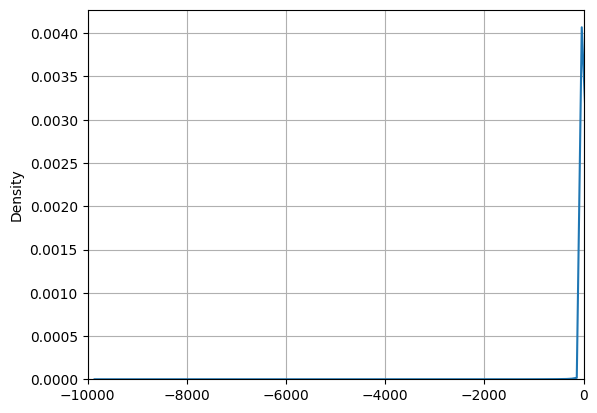

In [522]:
diff_between_surfaces = data_preprocessed["surface_total"] - data_preprocessed["surface_covered"]
sns.kdeplot(data=diff_between_surfaces)
plt.xlim([-10000,0])
plt.grid(True)

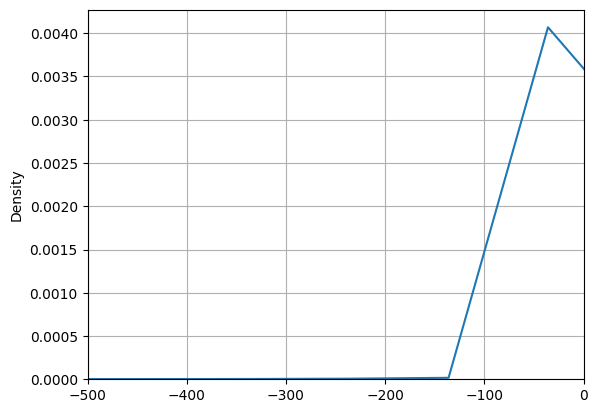

In [523]:
sns.kdeplot(data=diff_between_surfaces)
plt.xlim([-500,0])
plt.grid(True)

De manera arbitraria, borraré aquellos registros en los que la superficie cubierta es más de 100 metros cuadrados mayor a la superficie total

In [524]:
data_preprocessed[(data_preprocessed["surface_total"] - data_preprocessed["surface_covered"]) < -100].shape[0]

637

In [525]:
data_preprocessed = data_preprocessed[(data_preprocessed["surface_total"] - data_preprocessed["surface_covered"]) > -10]

### Exploración de outliers de variables categóricas

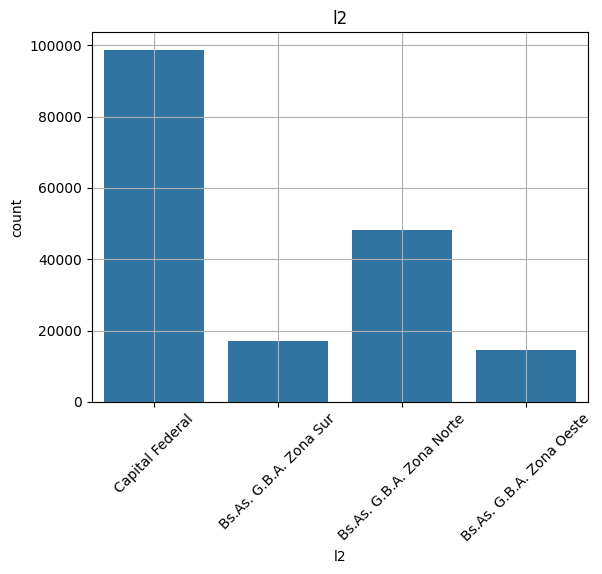

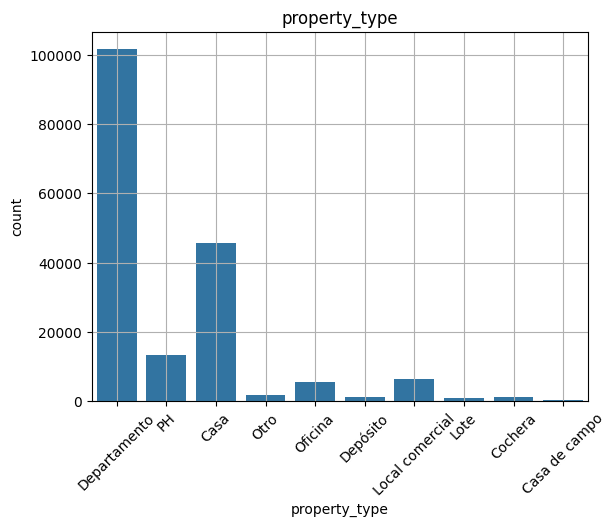

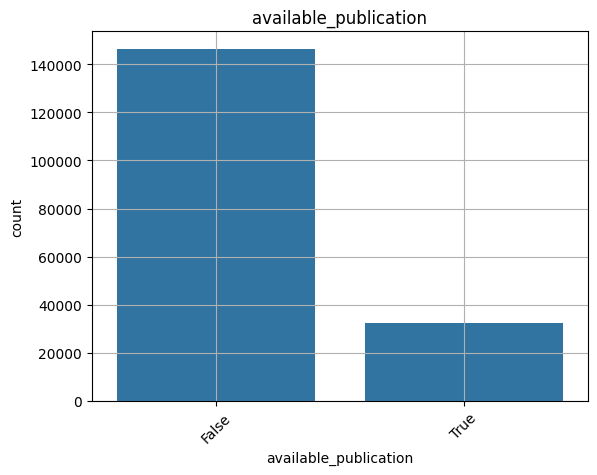

In [543]:
for col in categoric_cols:
    sns.countplot(data=data_preprocessed, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

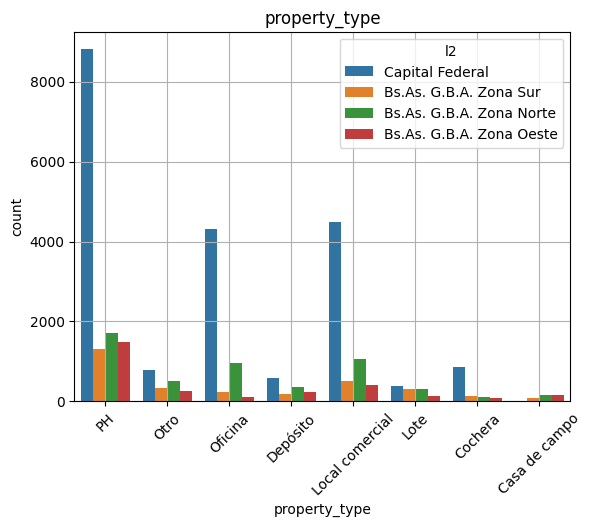

In [527]:
sns.countplot(
    data=data_preprocessed[~ data_preprocessed["property_type"].isin(["Departamento","Casa"])],
    x="property_type",
    hue="l2"
)

plt.title("property_type")
plt.xticks(rotation=45)
plt.grid()

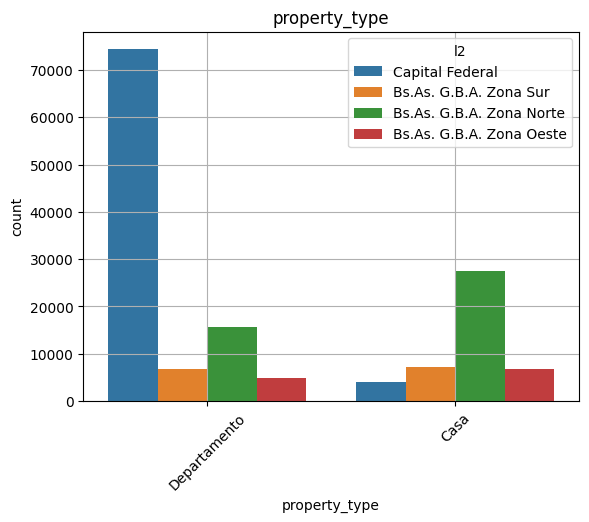

In [528]:
sns.countplot(
    data=data_preprocessed[data_preprocessed["property_type"].isin(["Departamento","Casa"])],
    x="property_type",
    hue="l2"
)

plt.title("property_type")
plt.xticks(rotation=45)
plt.grid()

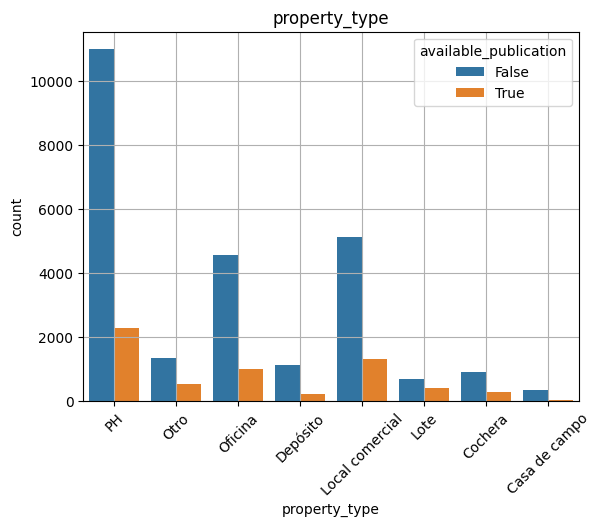

In [546]:
sns.countplot(
    data=data_preprocessed[~ data_preprocessed["property_type"].isin(["Departamento","Casa"])],
    x="property_type",
    hue="available_publication"
)

plt.title("property_type")
plt.xticks(rotation=45)
plt.grid()

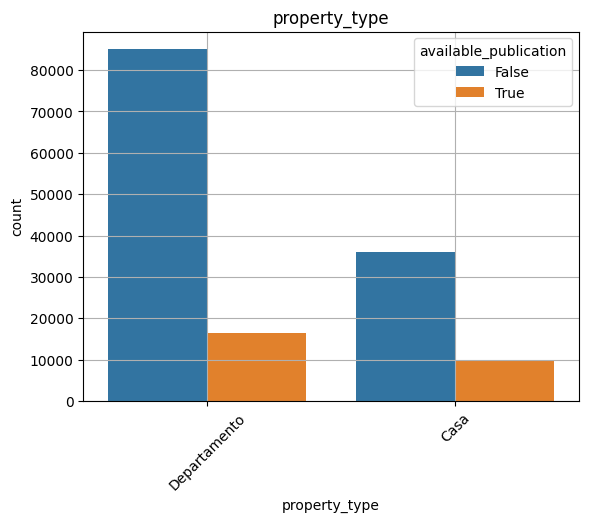

In [547]:
sns.countplot(
    data=data_preprocessed[data_preprocessed["property_type"].isin(["Departamento","Casa"])],
    x="property_type",
    hue="available_publication"
)

plt.title("property_type")
plt.xticks(rotation=45)
plt.grid()

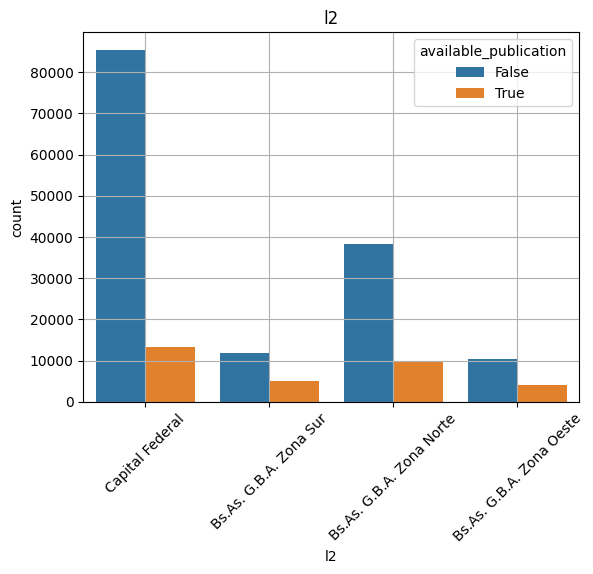

In [550]:
sns.countplot(
    data=data_preprocessed,
    x="l2",
    hue="available_publication"
)

plt.title("l2")
plt.xticks(rotation=45)
plt.grid()

Insight: la cantidad de publicaciones finalizadas por zona es más similar que la cantidad de publicaciones no finalizadas

En principio no distingo outliers durante el análisis univariado y bivariado de las variables categóricas

### Exploración post tratamiento de outliers

In [529]:
print(numeric_cols)
print(categoric_cols)

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'days_since_start', 'days_since_end',
       'surface_uncovered'],
      dtype='object')
Index(['l2', 'property_type'], dtype='object')


#### Análisis univariado

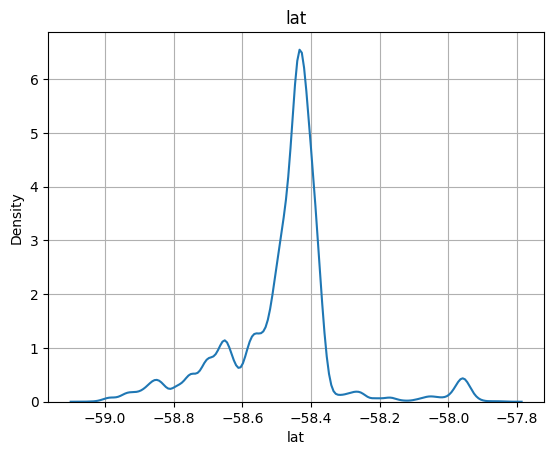

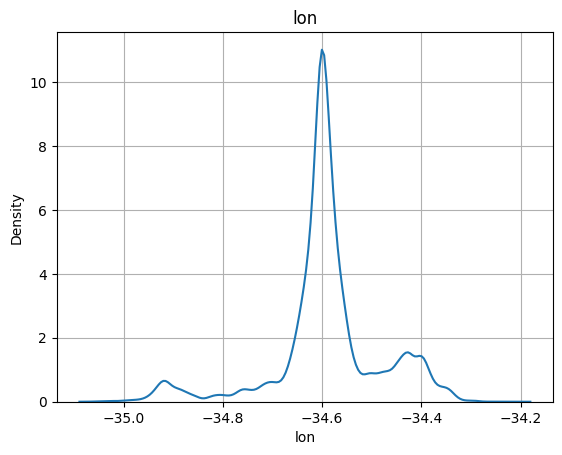

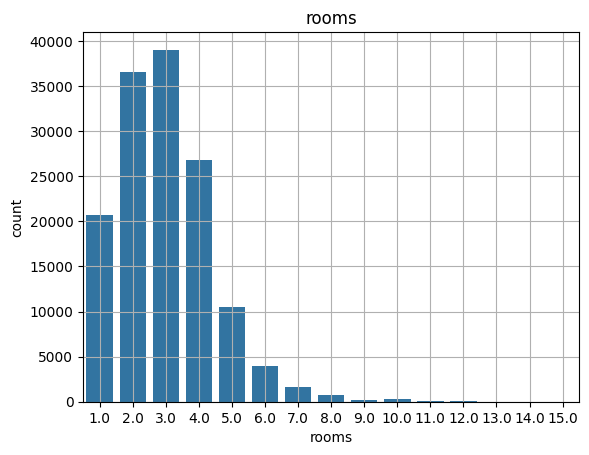

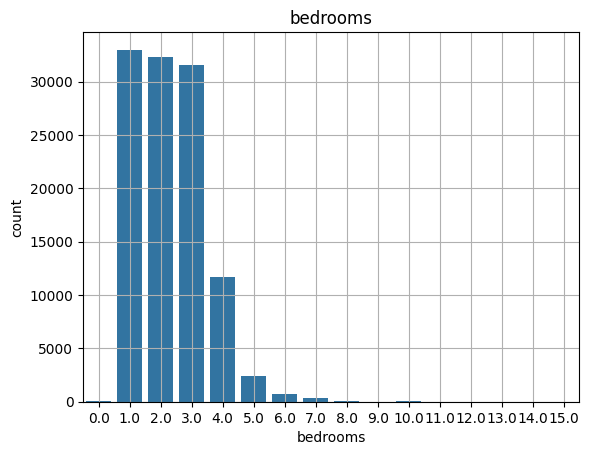

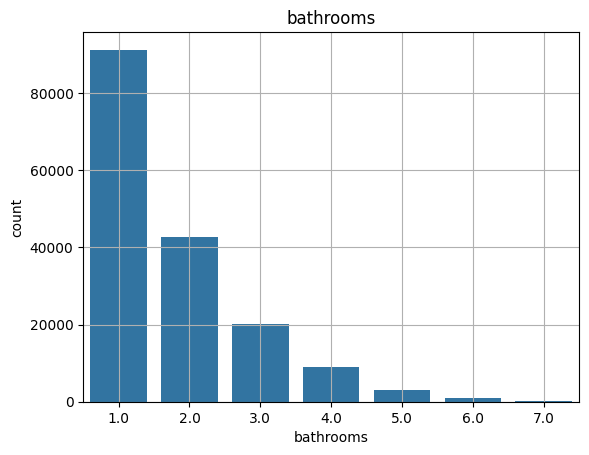

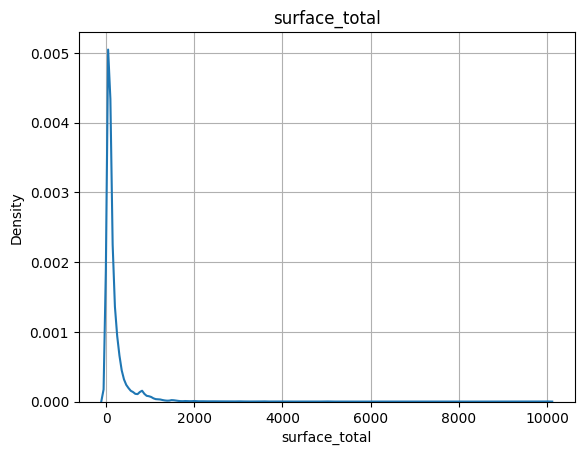

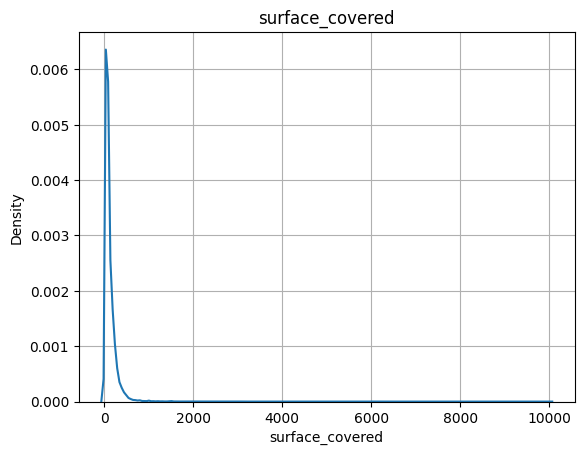

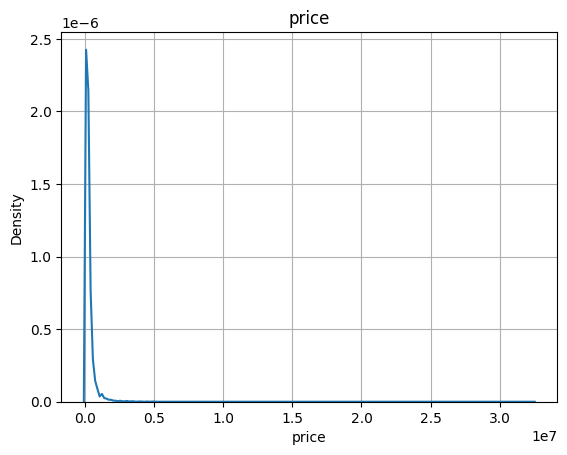

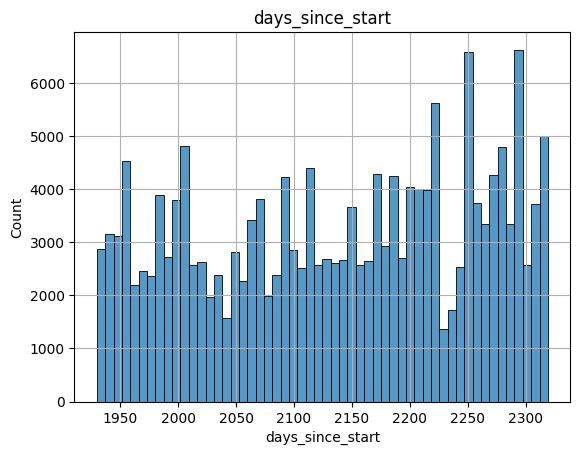

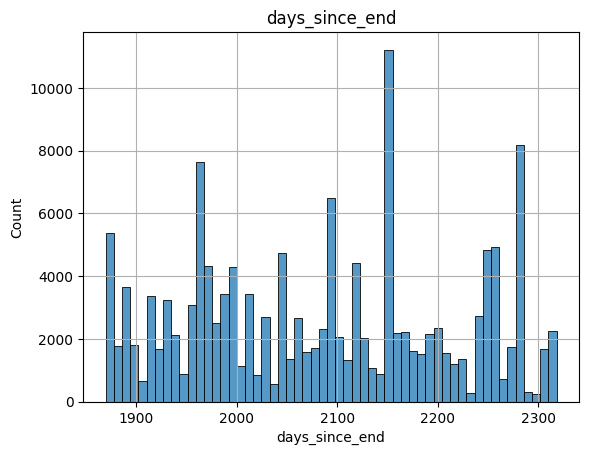

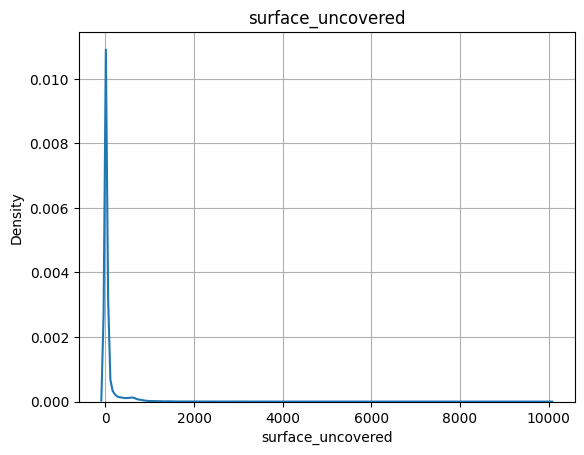

In [530]:
for col in numeric_cols:
    if col in ["rooms","bedrooms","bathrooms"]:
        sns.countplot(data=data_preprocessed, x=col)
    elif col in ["days_since_start","days_since_end"]:
        sns.histplot(data=data_preprocessed, x=col)
    else:
        sns.kdeplot(data=data_preprocessed, x=col)
    plt.title(col)
    plt.grid(True)
    plt.show()

In [531]:
columns_max_values = {
    "surface_total": 2000,
    "surface_covered": 2000,
    "surface_uncovered": 2000,
    "price": 5000000
}

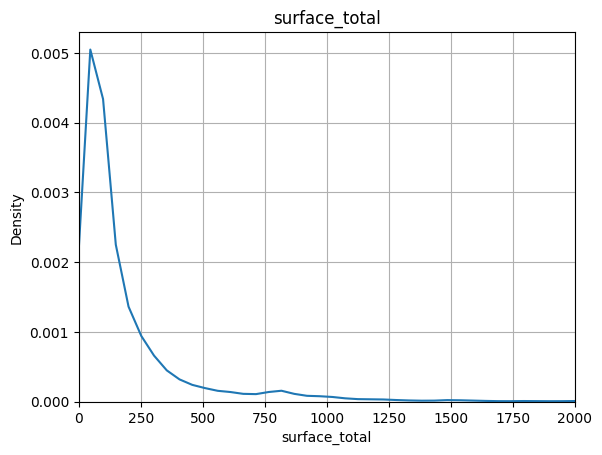

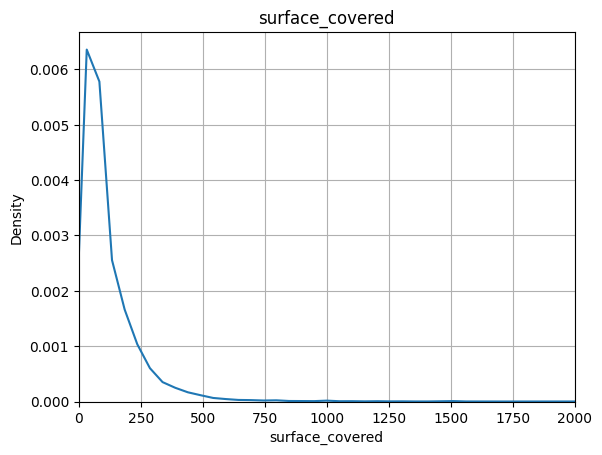

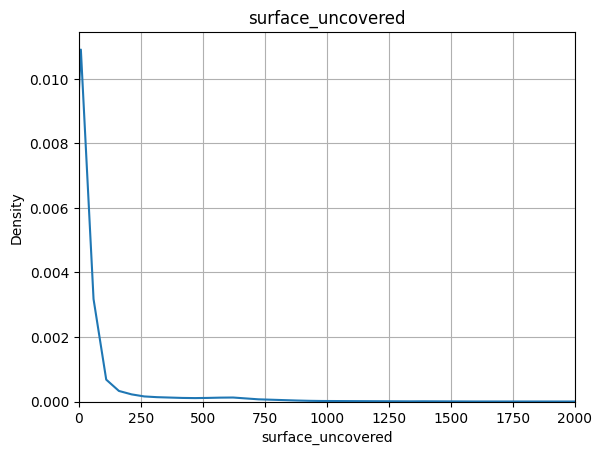

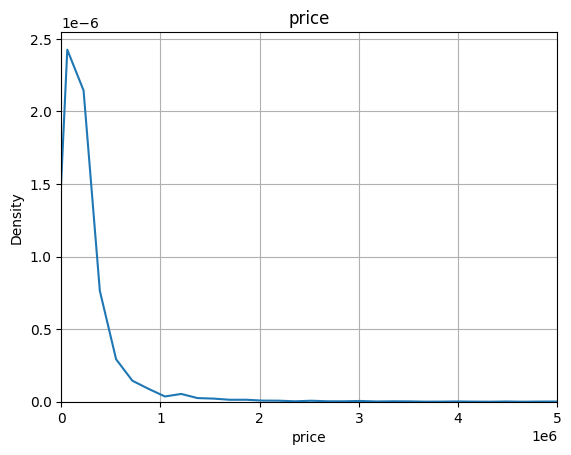

In [536]:
for col in columns_max_values:
    columns_max_values[col]
    sns.kdeplot(data=data_preprocessed, x=col)
    plt.xlim(0, columns_max_values[col])
    plt.title(col)
    plt.grid(True)
    plt.show()

#### Análisis bivariado

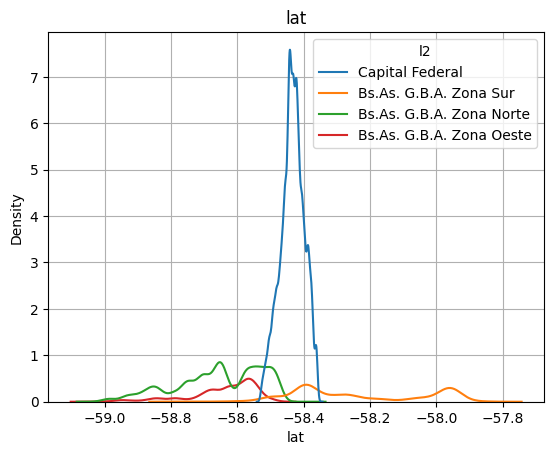

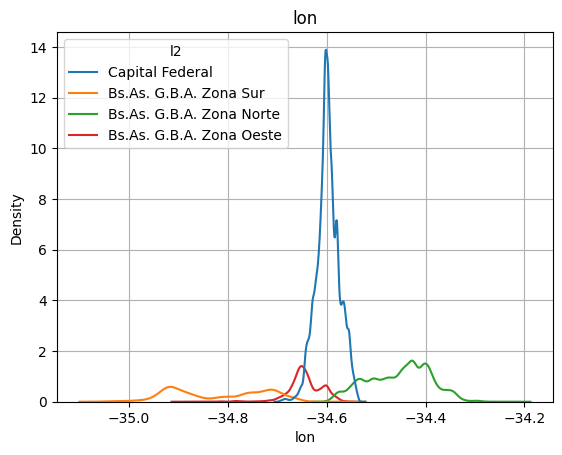

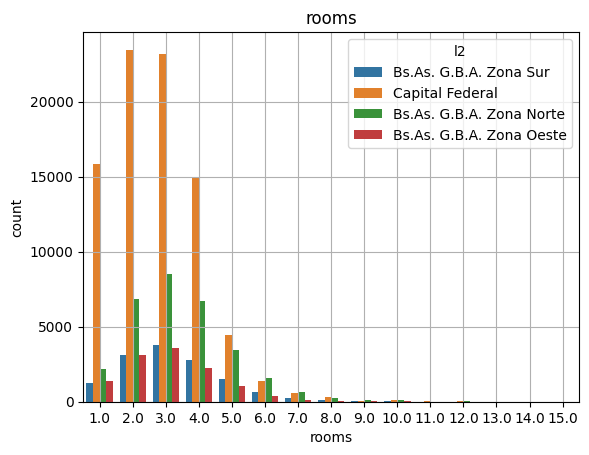

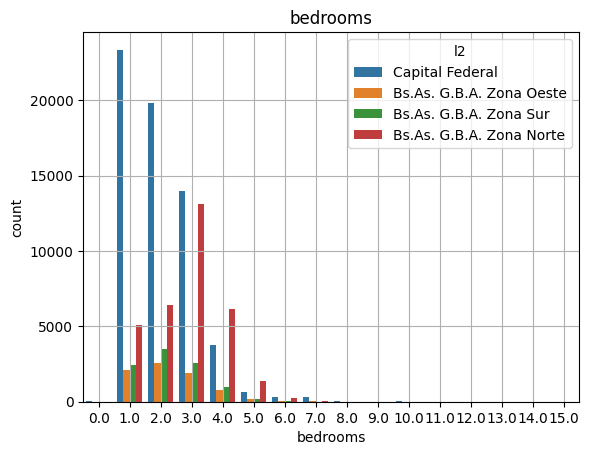

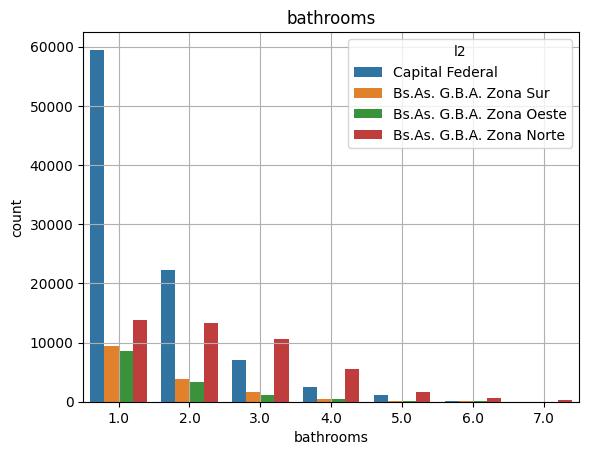

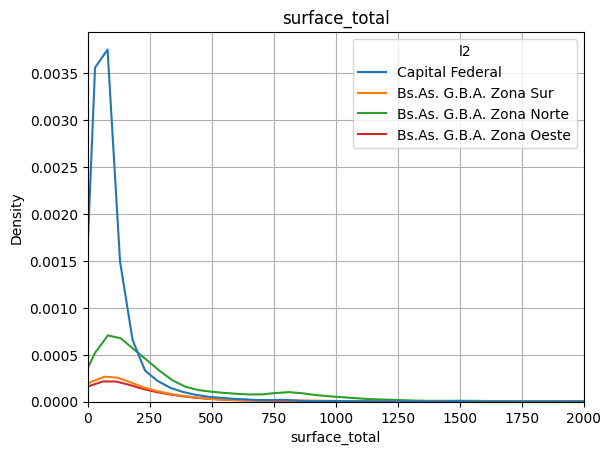

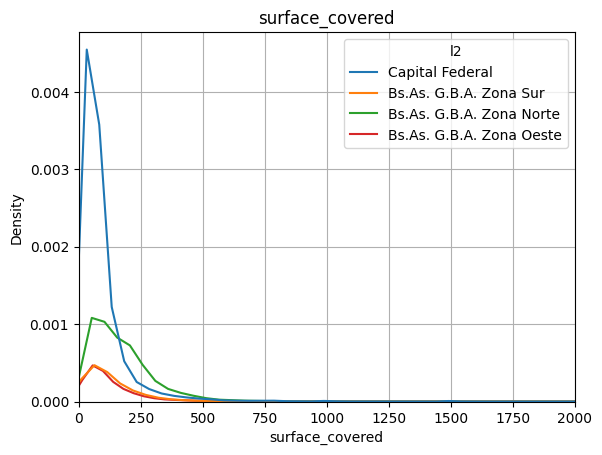

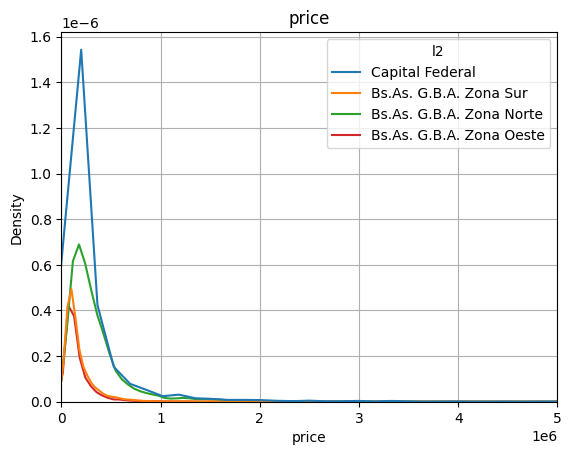

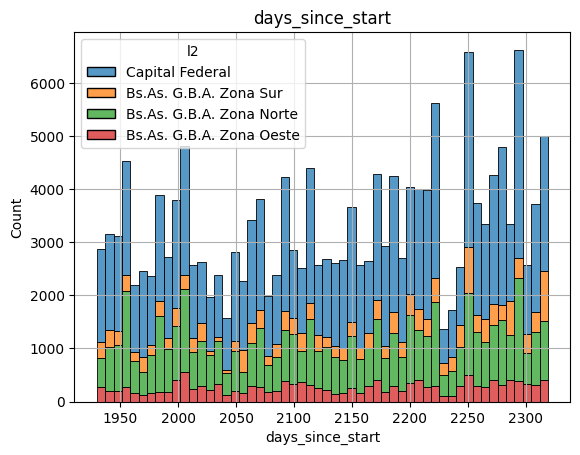

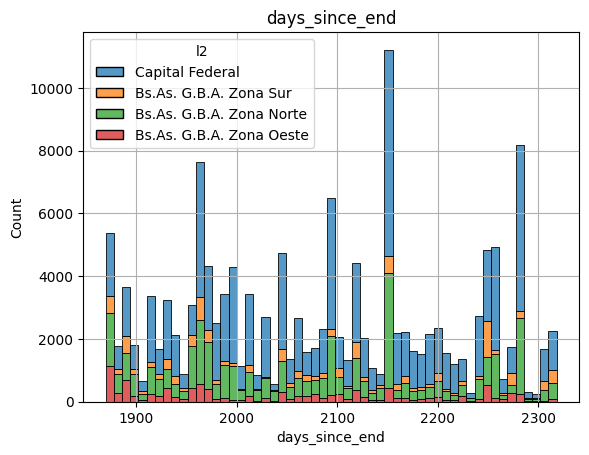

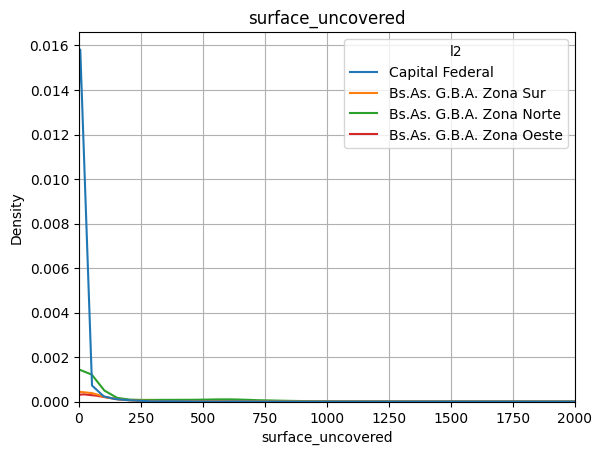

In [554]:
for col in numeric_cols:
    if col in ["rooms","bedrooms","bathrooms"]:
        sns.countplot(data=data_preprocessed, x=col, hue="l2")
    elif col in ["days_since_start","days_since_end"]:
        sns.histplot(data=data_preprocessed, x=col, hue="l2", multiple="stack")
    else:
        sns.kdeplot(data=data_preprocessed, x=col, hue="l2")
        
    if col in columns_max_values.keys():
        plt.xlim(0, columns_max_values[col])
        
    plt.title(col)
    plt.grid(True)
    plt.show()

#### Correlaciones

In [389]:
data_corr = data_preprocessed[numeric_cols].corr().round(2)

Se puede observar que las variables de lat, lon, days_since_start y days_since_end tiene muy baja correlación con las demás

<Axes: >

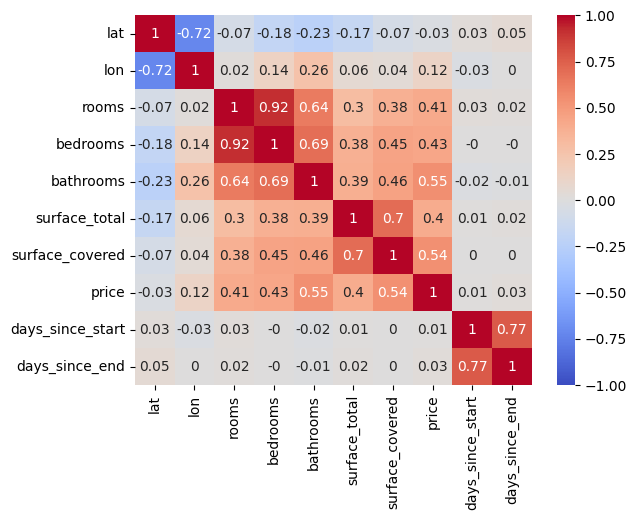

In [390]:
sns.heatmap(data_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

# Pendientes

In [366]:
# TODO: Revisar variación de precios a medida pasa el tiempo
# TODO: Revisar en qué zonas están las propiedades con superficie muy alta

## Generar un dataset limpio final y guardarlo como `data/processed.csv`.